# **Training Dataset**

**Library-library yang digunakan**

In [0]:
#Primitive function
from __future__ import absolute_import, division, print_function, unicode_literals

#Tensorflow Sensor
try:
  %tensorflow_version 2.x
except Exception:
  pass

#Tensorflow Library  
import tensorflow as tf
import tensorflow.python.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import model_from_json, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import to_categorical, CustomObjectScope

#Library Lain
import glob
import os
import h5py
import math
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from PIL import Image
import random
import cv2

**Import direktori dari Google Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Memasukan Dataset**

***Gambar***

*Dari Numpy Array yang Telah Disave*

In [0]:
data = np.load('/content/drive/My Drive/Colab Notebooks/kmnist-test-imgs.npz')
test_images = data['arr_0']
data = np.load('/content/drive/My Drive/Colab Notebooks/kmnist-test-labels.npz')
test_labels = data['arr_0']
data = np.load('/content/drive/My Drive/Colab Notebooks/kmnist-train-imgs.npz')
train_images = data['arr_0']
data = np.load('/content/drive/My Drive/Colab Notebooks/kmnist-train-labels.npz')
train_labels = data['arr_0']

In [0]:
#Show All Variabels
%whos

Interactive namespace is empty.


In [0]:
print(test_images.shape)
print(test_labels.shape)
print(train_images.shape)
print(train_labels.shape)

(10000, 28, 28)
(10000,)
(60000, 28, 28)
(60000,)


**Menampilkan Gambar**

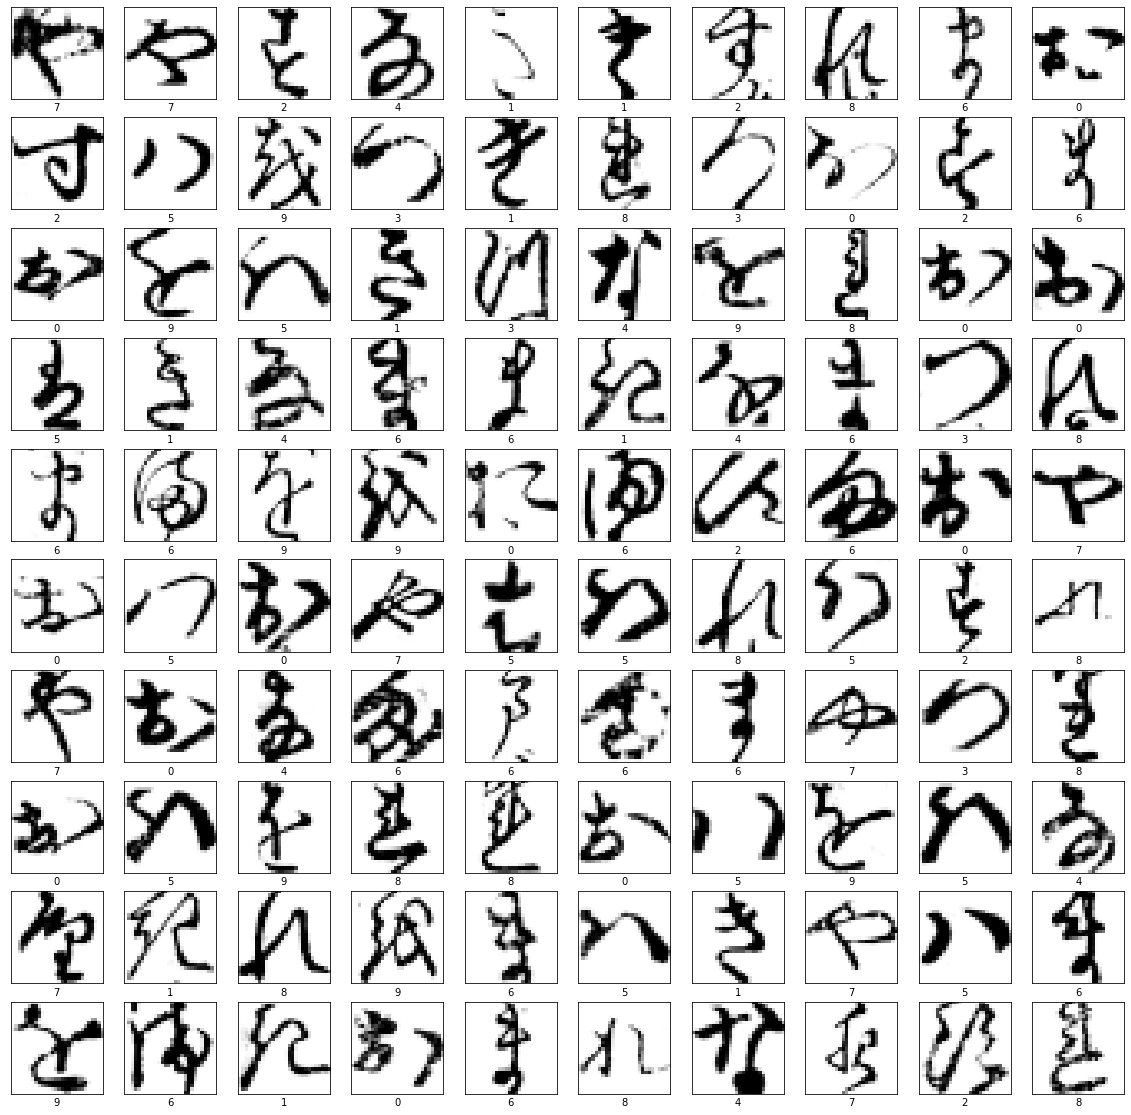

In [0]:
# Plot random Train Images

plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    num = random.randint(1,60000)
    plt.grid(False)
    plt.imshow(train_images[num], cmap="Greys")
    plt.xlabel(train_labels[num])
plt.show()

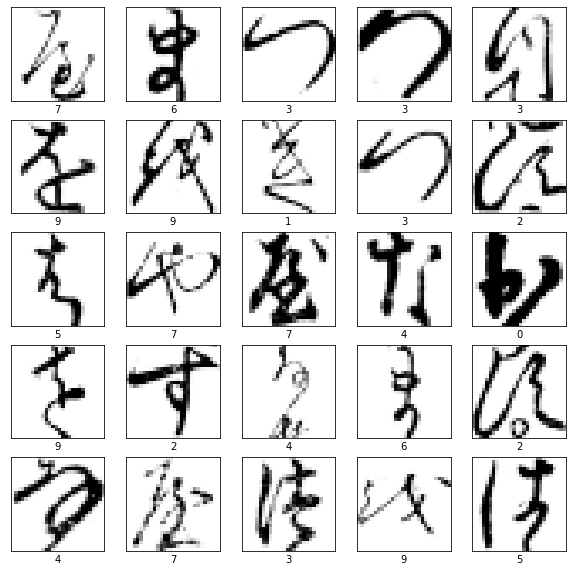

In [0]:
#Plot random Test Images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    num = random.randint(1,10000)
    plt.grid(False)
    plt.imshow(test_images[num], cmap="Greys")
    plt.xlabel(test_labels[num])
plt.show()

**Sistem Learning**

In [0]:
# Reshape for showing image at the above
test_images = test_images.reshape(test_images.shape[0], 28, 28)
train_images = train_images.reshape(train_images.shape[0], 28, 28)

In [0]:
#Using Resolution 28x28 pixels

#Reshape for training
test_images = test_images.reshape(test_images.shape[0], 28, 28,1)
train_images = train_images.reshape(train_images.shape[0], 28, 28,1)

#Models : CNN + Maxpooling + CNN + Maxpool + Flatten + NN + NN
model = models.Sequential()
model.add(layers.Conv2D(6, (3, 3),use_bias=False, activation='relu', input_shape=(28, 28, 1), name ='layer_1'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(6, (3, 3),use_bias=False, activation='relu', name = 'layer_2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, use_bias=False, activation='relu', name='layer_3'))
model.add(layers.Dense(10, use_bias=False, activation='softmax', name='layer_Output'))

In [0]:
#Showing the Summary
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Conv2D)             (None, 26, 26, 3)         27        
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 13, 13, 3)         0         
_________________________________________________________________
layer_2 (Conv2D)             (None, 11, 11, 3)         81        
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 5, 5, 3)           0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 75)                0         
_________________________________________________________________
layer_3 (Dense)              (None, 64)                4800      
_________________________________________________________________
layer_Output (Dense)         (None, 10)              

In [0]:
#Compilation & Training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs =3,
                    validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 25s 424us/sample - loss: 2.0573 - accuracy: 0.7235 - val_loss: 0.9424 - val_accuracy: 0.7258
Epoch 2/3
60000/60000 [==============================] - 25s 412us/sample - loss: 0.3664 - accuracy: 0.8891 - val_loss: 0.6224 - val_accuracy: 0.8193
Epoch 3/3
60000/60000 [==============================] - 25s 411us/sample - loss: 0.2469 - accuracy: 0.9258 - val_loss: 0.5119 - val_accuracy: 0.8556


**Summary Hasil Training**

10000/1 - 2s - loss: 0.8121 - accuracy: 0.8556


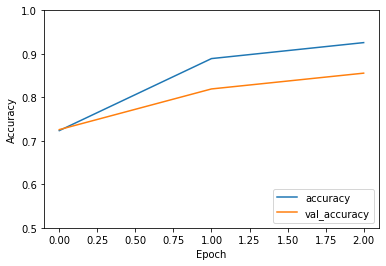

In [0]:
#Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

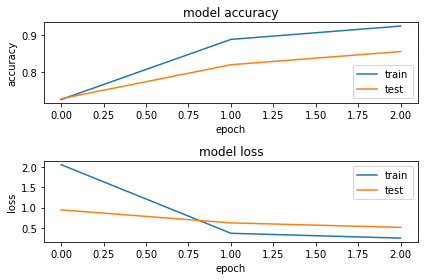

In [0]:
#Plot All
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


In [0]:
#Print the Evaluation Variabels
print(test_acc)
print(test_loss)

0.8556
0.5119460369110107


# **Pembuatan File Weights**

**Simpan Model ke File h5 dan json**

In [0]:
#Serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#Serialize weights to HDF5
model.save_weights("CNN_Model.h5")
print("Saved model to disk")

Saved model to disk


# **Verifikasi**

In [6]:
#Open File
json_file = open('/content/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#Load weights into new model
loaded_model.load_weights("/content/CNN_Model.h5")
print("Loaded model from disk")

Loaded model from disk


In [7]:
#List all the h5 directory
f = h5py.File("/content/CNN_Model.h5")
list(f)
list(f['layer_1'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


['layer_1']

In [0]:
#Get weight to local variabels
with h5py.File('/content/CNN_Model.h5','r') as hdf:
    layer_1_data = np.array(hdf.get('layer_1/layer_1/kernel:0'))
    layer_2_data = np.array(hdf.get('layer_2/layer_2/kernel:0'))
    layer_3_data = np.array(hdf.get('layer_3/layer_3/kernel:0'))
    layer_out_data = np.array(hdf.get('layer_Output/layer_Output/kernel:0'))

**Verifikasi Weight**

In [0]:
#Print all shape weights
print(layer_1_data.shape)
print(layer_2_data.shape)
print(layer_3_data.shape)
print(layer_out_data.shape)

(3, 3, 1, 6)
(3, 3, 6, 6)
(150, 64)
(64, 10)


In [9]:
#Verification
weights = np.array(model.get_weights())
print(np.array_equal(weights[0],layer_1_data))
print(np.array_equal(weights[1],layer_2_data))
print(np.array_equal(weights[2],layer_3_data))
print(np.array_equal(weights[3],layer_out_data))

NameError: ignored

# **Kuantisasi Weights**

**Buka File h5 dan json**

In [0]:
# Model reconstruction from JSON file
with open('/content/model.json', 'r') as f:
    loaded_model = model_from_json(f.read())

# Load weights into the new model
loaded_model.load_weights('/content/CNN_Model.h5')
loaded_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
with h5py.File('/content/CNN_Model.h5','r') as hdf:
    layer_1_data = np.array(hdf.get('layer_1/layer_1/kernel:0'))
    layer_2_data = np.array(hdf.get('layer_2/layer_2/kernel:0'))
    layer_3_data = np.array(hdf.get('layer_3/layer_3/kernel:0'))
    layer_out_data = np.array(hdf.get('layer_Output/layer_Output/kernel:0'))
    
#load dataset SUDAH

**Verifikasi kedua**

In [0]:
#Print all shape data weights
print(layer_1_data.shape)
print(layer_2_data.shape)
print(layer_3_data.shape)
print(layer_out_data.shape)

(3, 3, 1, 6)
(3, 3, 6, 6)
(150, 64)
(64, 10)


**Fungsi-fungsi yang digunakan**

In [0]:
def pool2d(mat,ksize,method='max',pad=False):
    m, n = mat.shape[1:]
    ky,kx=ksize

    _ceil=lambda x,y: int(numpy.ceil(x/float(y)))

    if pad:
        ny=_ceil(m,ky)
        nx=_ceil(n,kx)
        size=(mat.shape[0],ny*ky, nx*kx)
        mat_pad=numpy.full(size,numpy.nan)
        mat_pad[:m,:n,...]=mat
    else:
        ny=m//ky
        nx=n//kx
        mat_pad=mat[..., :ny*ky, :nx*kx]

    new_shape=(mat.shape[0],ny,ky,nx,kx)

    if method=='max':
        result=np.nanmax(mat_pad.reshape(new_shape),axis=(2,4))
    else:
        result=np.nanmean(mat_pad.reshape(new_shape),axis=(2,4))

    return result

def channel_im2col(A):
    B = [3,3]
    skip=[1,1]
    # Parameters 
    D,M,N = A.shape
    col_extent = N - B[1] + 1
    row_extent = M - B[0] + 1

    # Get Starting block indices
    start_idx = np.arange(B[0])[:,None]*N + np.arange(B[1])

    # Generate Depth indeces
    didx=M*N*np.arange(D)
    start_idx=(didx[:,None]+start_idx.ravel()).reshape((-1,B[0],B[1]))

    # Get offsetted indices across the height and width of input array
    offset_idx = np.arange(row_extent)[:,None]*N + np.arange(col_extent)

    # Get all actual indices & index into input array for final output
    out = np.take (A,start_idx.ravel()[:,None] + offset_idx[::skip[0],::skip[1]].ravel())
    return out


def conv2d(filt,act):
    '''
    conv 2d function
    act = widht, height,depth (w1,h1,d1)
    default = 3,3 filter, stride = 1, p = 0
    im2col reshape
    
    W2=(W1−F+2P)/S+1
    H2=(H1−F+2P)/S+1
    D2=K
    '''
    P = 0
    S = 1
    D1,H1,W1 = act.shape
    n_f,d_f,h_f,w_f = filt.shape
    window_size = d_f*h_f*w_f
    filter_reshape = n_f,window_size
    W2=(W1-h_f +2*P)//S+1
    H2=(H1- h_f+2*P)//S+1
    D2= n_f
    m = channel_im2col(act)
    filt = filt.reshape(filter_reshape)
    res = np.matmul(filt, m)
    res = res.reshape(D2,W2,H2)
    return res

def softmax(X):
    expo = np.exp(X)
    expo_sum = np.sum(np.exp(X))
    return expo/expo_sum

def relu(X):
    return np.maximum(0,X)

def prequant(data,bits):
    MaxValue = np.amax(data)
    MinValue = np.amin(data)
    Range_Real = MaxValue - MinValue
    if(Range_Real==0):
        Range_Real = 1
    Scale = (Range_Real/(pow(2,bits)-1))
    return Scale, Range_Real

def quantize(Val, Range_Real, Scale, zero_point):  
    temp = round(Val * (1/Scale) + zero_point)
    return temp
quantizefunc = np.vectorize(quantize)

In [0]:
def Model2(img):
    global q_weight1
    global q_weight2
    global q_weight3
    global q_weightout
    Scale_w1,Range_Real_w1 = prequant(layer_1_data,8)
    Scale_d1,Range_Real_d1 = prequant(img.reshape(1,28,28),8)
    quantized_w1 = quantizefunc(layer_1_data,Range_Real_w1,Scale_w1,0)
    quantized_d1 = quantizefunc(img.reshape(1,28,28),Range_Real_d1,Scale_d1,0)
    q_weight1 = quantized_w1

    layer_1_out = relu(conv2d(quantized_w1,quantized_d1))
    layer_1_out = Scale_d1*Scale_w1*pool2d(layer_1_out, (2, 2))
    
    Scale_w2,Range_Real_w2 = prequant(layer_2_data,8)
    Scale_d2,Range_Real_d2 = prequant(layer_1_out,8)
    quantized_w2 = quantizefunc(layer_2_data,Range_Real_w2,Scale_w2,0)
    quantized_d2 = quantizefunc(layer_1_out,Range_Real_d2,Scale_d2,0)
    q_weight2 = quantized_w2
    
    layer_2_out = relu(conv2d(quantized_w2,quantized_d2))
    layer_2_out = Scale_d2*Scale_w2*pool2d(layer_2_out, (2, 2))
    layer_2_out = layer_2_out.transpose(1,2,0) ### ubah format data dari CHW ke WHC
    layer_2_out = layer_2_out.reshape(150)
    
    Scale_w3,Range_Real_w3 = prequant(layer_3_data,8)
    Scale_d3,Range_Real_d3 = prequant(layer_2_out,8)
    quantized_w3 = quantizefunc(layer_3_data,Range_Real_w3,Scale_w3,0)
    quantized_d3 = quantizefunc(layer_2_out,Range_Real_d3,Scale_d3,0)
    q_weight3 = quantized_w3

    layer_3_out = np.matmul(quantized_d3,quantized_w3)
    layer_3_out = Scale_d3*Scale_w3*relu(layer_3_out)
    
    Scale_w4,Range_Real_w4 = prequant(layer_out_data,8)
    Scale_d4,Range_Real_d4 = prequant(layer_3_out,8)
    quantized_w4 = quantizefunc(layer_out_data,Range_Real_w4,Scale_w4,0)
    quantized_d4 = quantizefunc(layer_3_out,Range_Real_d4,Scale_d4,0)
    q_weightout = quantized_w4
    
    layer_last_out = Scale_d4*Scale_w4*np.matmul(quantized_d4,quantized_w4)
    layer_last_out = softmax(layer_last_out)
    return layer_last_out,

In [0]:
#Transpose Layer 1 dan Layer 2
layer_1_data = layer_1_data.transpose(3,2,0,1)
layer_2_data= layer_2_data.transpose(3,2,0,1)

**Training & Verifikasi dari weights yang telah ada**

In [0]:
#Train from the weights

val_num_uq = 0
val_num_q = 0
correct_q = np.empty(10000)
correct_uq = np.empty(10000)
val_num_q_2 = 0
correct_q_2 = np.empty(10000)

for i in range(10000):
    indata = test_images[i]/255
    label = test_labels[i]
    
    #data = indata.ravel()
    
    keras_res = loaded_model.predict_classes(indata.reshape(1,28,28,1))
    res = Model2(indata.reshape(1,28,28))
    
    if(label==keras_res[0]):        
        correct_q[val_num_q] = i
        val_num_q += 1

    if(label==np.argmax(res)):
        correct_uq[val_num_uq] = i
        val_num_uq += 1
        
print('val_num_keras_model :', val_num_q)
print('val_num_quantized_model :', val_num_uq)

print('val val_num_keras_model :', (val_num_q/10000)*100,'%')
print('val quantized  :', (val_num_uq/10000)*100,'%')

val_num_keras_model : 8638
val_num_quantized_model : 8630
val val_num_keras_model : 86.38 %
val quantized  : 86.3 %


**Training & Verifikasi dari test images**

In [0]:
timg3=cv2.imread("/content/3.jpg",cv2.IMREAD_GRAYSCALE)
timg3 =cv2.bitwise_not(timg3)
timg3 = cv2.resize(timg3, (28, 28))

timg2=cv2.imread("/content/2.jpg",cv2.IMREAD_GRAYSCALE)
timg2 =cv2.bitwise_not(timg2)
timg2 = cv2.resize(timg2, (28, 28))

timg5=cv2.imread("/content/5.jpg",cv2.IMREAD_GRAYSCALE)
timg5 =cv2.bitwise_not(timg5)
timg5 = cv2.resize(timg5, (28, 28))

timg7=cv2.imread("/content/7.jpg",cv2.IMREAD_GRAYSCALE)
timg7 =cv2.bitwise_not(timg7)
timg7 = cv2.resize(timg7, (28, 28))

Gambar ini diklasifikasikan sebagai :
4


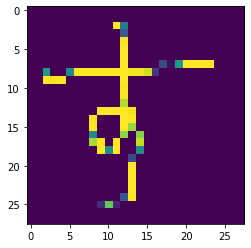

In [33]:
#Train from file Label 2

indata = timg2/255
res = Model2(indata.reshape(1,28,28))
plt.imshow(timg2)
print("Gambar ini diklasifikasikan sebagai :")
print(np.argmax(res))

Gambar ini diklasifikasikan sebagai :
3


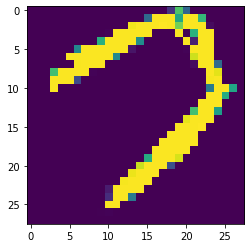

In [32]:
#Train from file Label 3

indata = timg3/255
res = Model2(indata.reshape(1,28,28))
plt.imshow(timg3)
print("Gambar ini diklasifikasikan sebagai :")
print(np.argmax(res))

Gambar ini diklasifikasikan sebagai :
2


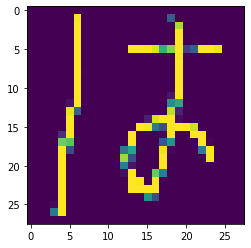

In [34]:
#Train from file Label 5

indata = timg5/255
res = Model2(indata.reshape(1,28,28))
plt.imshow(timg5)
print("Gambar ini diklasifikasikan sebagai :")
print(np.argmax(res))

Gambar ini diklasifikasikan sebagai :
5


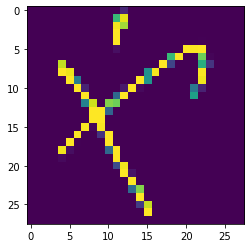

In [35]:
#Train from file Label 7

indata = timg7/255
res = Model2(indata.reshape(1,28,28))
plt.imshow(timg7)
print("Gambar ini diklasifikasikan sebagai :")
print(np.argmax(res))

In [0]:
#Print all shape weights
print(q_weight1.shape)
print(q_weight2.shape)
print(q_weight3.shape)
print(q_weightout.shape)

(12, 1, 3, 3)
(6, 12, 3, 3)
(150, 10)
(10, 6)


In [0]:
#Data Weights sebelum kuantisasi
print("Weights Layer 1 :\n")
print(layer_1_data)
print(np.max(layer_1_data))

Weights Layer 1 :

[[[[-0.01329492 -0.04109416  0.18368442]
   [-0.08848076 -0.23120067  0.2300477 ]
   [ 0.02856025 -0.14770463  0.07292501]]]


 [[[ 0.13481796  0.04253075  0.00621174]
   [ 0.22631559 -0.05169058 -0.20278576]
   [-0.2508549  -0.0616309   0.1516854 ]]]


 [[[ 0.03414535  0.08352276  0.26121908]
   [-0.0428066  -0.10331271  0.33986697]
   [-0.2800591  -0.32983336  0.04384084]]]


 [[[ 0.40146092  0.18687972  0.07025485]
   [ 0.4553984   0.2555486   0.02328041]
   [ 0.15735473  0.28871608  0.01448023]]]


 [[[ 0.11272542  0.19433409 -0.15595715]
   [-0.07399441 -0.07087922 -0.19032665]
   [ 0.0129567  -0.06671017  0.23103958]]]


 [[[ 0.2650003   0.27509287  0.13812749]
   [ 0.3159532   0.34829774  0.34993526]
   [ 0.30125812  0.04737267 -0.00420555]]]


 [[[ 0.28099698 -0.29697728 -0.3330829 ]
   [-0.08445876  0.1538653   0.08260127]
   [ 0.18151839  0.02573946  0.00424811]]]


 [[[ 0.18709491 -0.25164706 -0.24790719]
   [ 0.33706054  0.24250107  0.0437585 ]
   [-0.010

In [0]:
#Weights sesudah kuantisasi
print("Weights Layer 1 :\n")
print(q_weight1)
print(np.max(q_weight1))

Weights Layer 1 :

[[[[  -3.   27.  -73.]
   [  15.   24. -108.]
   [   8.  102.    3.]]]


 [[[  37.   52.   88.]
   [  54.   -5.  -63.]
   [   7.   33.   50.]]]


 [[[  -3.  -47. -141.]
   [-139.   49.  -40.]
   [ 105. -138.   -7.]]]


 [[[   8.   75.  -67.]
   [  58.   19.  -88.]
   [ -59.   75.  -24.]]]


 [[[ -41. -150.  -34.]
   [  28.  -71.   51.]
   [ -25.    1.   35.]]]


 [[[  51.  -40.  -38.]
   [ -19.   62.  -41.]
   [  50.   -1.   20.]]]]
105.0


In [0]:
print("Weights Layer 2 :\n")
print(q_weight2[1])

Weights Layer 2 :

[[[ -47.  -44.  -46.]
  [ -10.  -52.  -85.]
  [  59.   59.   62.]]

 [[  47.  -66.   72.]
  [ -25.  -46.   -6.]
  [ -40.  -79.  -67.]]

 [[  64.  -36.   72.]
  [ -82.  -37.  -58.]
  [  -4.   34.   37.]]

 [[  39.   10.   -5.]
  [  -1.   78.   36.]
  [ -71.   -9.   -8.]]

 [[  90.   35.  -20.]
  [ -62.   -6.   21.]
  [ -13.  -21.   12.]]

 [[  40.   29.   74.]
  [   4.  -10. -107.]
  [  -5.  104.  104.]]]


In [0]:
#Output to .pny file (numpy array)
np.save('q_weight1.npy', q_weight1)
np.save('q_weight2.npy', q_weight2)
np.save('q_weight3.npy', q_weight3)
np.save('q_weightout.npy', q_weightout)
print("DONE")

DONE
